In [7]:
import librosa
import librosa.display
import numpy as np

In [9]:
!rm gtzan.zip
!gdown --id 1wAjDwxWMSjrWz4-tbQyWIyqGLMVetWed
!unzip gtzan.zip

K=10
sr = 22050
X_tr = np.load('gtzan_tr.npy')
y_tr_dense = X_tr[:,-1]
y_tr = np.zeros((X_tr.shape[0],K))
y_tr[range(X_tr.shape[0]),y_tr_dense.astype(int)] = 1
X_tr = X_tr[:,:-1]
X_vl = np.load('gtzan_cv.npy')
y_vl_dense = X_vl[:,-1]
y_vl = np.zeros((X_vl.shape[0],K))
y_vl[range(X_vl.shape[0]),y_vl_dense.astype(int)] = 1
X_vl = X_vl[:,:-1]
X_ts = np.load('gtzan_te.npy')
y_ts_dense = X_ts[:,-1]
y_ts = np.zeros((X_ts.shape[0],K))
y_ts[range(X_ts.shape[0]),y_ts_dense.astype(int)] = 1
X_ts = X_ts[:,:-1]

print('The shape of X_ts is: ', X_ts.shape)
print('The shape of y_ts is: ', y_ts.shape)
print('The shape of X_vl is: ', X_vl.shape)
print('The shape of y_vl is: ', y_vl.shape)
print('The shape of X_tr is: ', X_tr.shape)
print('The shape of y_tr is: ', y_tr.shape)

Downloading...
From: https://drive.google.com/uc?id=1wAjDwxWMSjrWz4-tbQyWIyqGLMVetWed
To: /Users/jerms/Documents/work/mir/vae/gtzan.zip
934MB [02:10, 7.15MB/s] 
Archive:  gtzan.zip
replace gtzan_tr.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
The shape of X_ts is:  (100, 44100)
The shape of y_ts is:  (100, 10)
The shape of X_vl is:  (100, 44100)
The shape of y_vl is:  (100, 10)
The shape of X_tr is:  (8000, 44100)
The shape of y_tr is:  (8000, 10)


In [4]:
sample = X_tr[0]

In [5]:
sample_spec = librosa.feature.melspectrogram(y=sample, sr=22050)

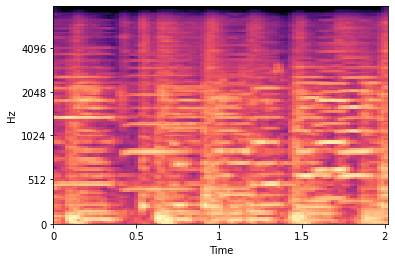

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(sample_spec, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)

In [18]:
y_ = librosa.feature.inverse.mel_to_audio(sample_spec)

In [20]:
from IPython.display import Audio
display(Audio(y_,rate=22050))

In [21]:
display(Audio(X_tr[0], rate=22050))

In [22]:
sample_spec.shape

(128, 87)